## Import files

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import re

In [2]:
# import hungarian negative word dictionary for sentiment analytics
with open("neg.txt", "r", encoding='utf-8') as f:
    neg = [i for line in f for i in line.split('\n')]
    neg = list(filter(None, neg))

In [3]:
# import hungarian positive word dictionary for sentiment analytics
with open("pos.txt", "r", encoding='utf-8') as f:
    pos = [i for line in f for i in line.split('\n')]
    pos = list(filter(None, pos))

In [179]:
# import the preprocessed dataframe
df = pd.read_pickle('index_sport_pol_senti_2.pkl')

## Polarity analysis

In [37]:
def sentiment_polarizer(df):
    sent = []
    for i in range(0, len(df)):
        if str(df[i]) in pos: 
            sent.append(1)
        elif str(df[i]) in neg: 
            sent.append(-1)
        else:
            sent.append(0)
    return sent

In [38]:
df['senti'] = df['merged_lemmas'].apply(lambda x: sentiment_polarizer(x))

In [40]:
def polariser(lista):
    atlagok = sum(lista) / len(lista)
    return atlagok

In [137]:
df['senti_pol'] = df['senti'].apply(lambda x: polariser(x))

In [138]:
df['month'] = df.datum.apply(lambda x: re.sub("\.","-",x[0:7]))

In [139]:
df['month'] = pd.to_datetime(df['month'])

In [147]:
df = df[df['cim'] != 'Molesztálta az ifiket, húsz évet kapott a Newcastle korábbi edzője']
df = df[df['cim'] != 'Törölték a kairói öttusa Vk-versenyt']

In [141]:
df.to_pickle('index_sport_pol_senti_2.pkl')

In [180]:
df1 = df[df["month"] > '2001-01-01']

In [149]:
df.columns

Index(['cim', 'datum', 'szerzo', 'tag', 'head', 'szoveg', 'merged', 'nyelv',
       'nap', 'cim_cleaned', 'szoveg_cleaned', 'merged_tokens',
       'merged_lemmas', 'sport', 'merged_ners', 'politika', 'id', 'senti',
       'senti_pol', 'month', 'topic'],
      dtype='object')

### Politikai cikkek aránya:

In [181]:
pd.set_option('display.max_rows', 16000)

In [193]:
cnt = df1[['cim', 'month']].groupby(['month']).count().reset_index()

In [194]:
mcount = pd.read_pickle('monthsum.pkl')
len(mcount)

265

In [195]:
mcount = mcount[['month', 'num_per_ho']].groupby(['month']).sum()
len(mcount)
mcount = mcount.reset_index()

In [196]:
cnt = pd.merge(cnt, mcount, how='left', on='month')

In [197]:
cnt['arany'] = cnt['cim'] / cnt['num_per_ho']

In [198]:
cnt[cnt['arany'] == cnt['arany'].min()]

month  cim  num_per_ho    arany
50 2005-04-01    2        2533  0.00079

In [199]:
cnt

month  cim  num_per_ho     arany
0   2001-02-01    6        1594  0.003764
1   2001-03-01    6        1835  0.003270
2   2001-04-01    4        1823  0.002194
3   2001-05-01    2        2085  0.000959
4   2001-06-01    4        1981  0.002019
5   2001-07-01    8        2272  0.003521
6   2001-08-01   12        2415  0.004969
7   2001-09-01    5        2924  0.001710
8   2001-10-01    6        2736  0.002193
9   2001-11-01    5        2298  0.002176
10  2001-12-01    9        1869  0.004815
11  2002-01-01    7        2144  0.003265
12  2002-02-01    7        1834  0.003817
13  2002-03-01   13        1928  0.006743
14  2002-04-01    8        1810  0.004420
15  2002-05-01   17        2014  0.008441
16  2002-06-01    9        1785  0.005042
17  2002-07-01    7        2226  0.003145
18  2002-08-01    5        1894  0.002640
19  2002-09-01    9        2138  0.004210
20  2002-10-01   11        2439  0.004510
21  2002-11-01    9        2353  0.003825
22  2002-12-01   11        2167  0.005076
23  2003-01-01    4        2550  0.001569
24  2003-02-01    4        2458  0.001627
25  2003-03-01    7        3034  0.002307
26  2003-04-01   14        2573  0.005441
27  2003-05-01   11        2954  0.003724
28  2003-06-01   10        2964  0.003374
29  2003-07-01    6        3253  0.001844
30  2003-08-01    7        2801  0.002499
31  2003-09-01   10        2986  0.003349
32  2003-10-01    8        3154  0.002536
33  2003-11-01    7        3128  0.002238
34  2003-12-01    6        2712  0.002212
35  2004-01-01   11        3047  0.003610
36  2004-02-01    7        2843  0.002462
37  2004-03-01    9        3055  0.002946
38  2004-04-01   12        2879  0.004168
39  2004-05-01   11        2867  0.003837
40  2004-06-01   10        2908  0.003439
41  2004-07-01    7        3003  0.002331
42  2004-08-01    7        2282  0.003067
43  2004-09-01    3        2776  0.001081
44  2004-10-01   15        2832  0.005297
45  2004-11-01    9        2653  0.003392
46  2004-12-01   10        2416  0.004139
47  2005-01-01   14        2508  0.005582
48  2005-02-01    6        2598  0.002309
49  2005-03-01    9        2732  0.003294
50  2005-04-01    2        2533  0.000790
51  2005-05-01    8        2676  0.002990
52  2005-06-01   10        2720  0.003676
53  2005-07-01   10        2731  0.003662
54  2005-08-01    4        2691  0.001486
55  2005-09-01    9        2653  0.003392
56  2005-10-01   16        2715  0.005893
57  2005-11-01   13        2732  0.004758
58  2005-12-01   16        2621  0.006105
59  2006-01-01   15        2844  0.005274
60  2006-02-01   10        2520  0.003968
61  2006-03-01   11        2934  0.003749
62  2006-04-01    4        2692  0.001486
63  2006-05-01   14        2923  0.004790
64  2006-06-01   22        2670  0.008240
65  2006-07-01   20        2848  0.007022
66  2006-08-01   16        2810  0.005694
67  2006-09-01   22        2892  0.007607
68  2006-10-01   19        3022  0.006287
69  2006-11-01   12        3198  0.003752
70  2006-12-01   19        2785  0.006822
71  2007-01-01   14        3500  0.004000
72  2007-02-01   13        2959  0.004393
73  2007-03-01   19        3230  0.005882
74  2007-04-01   37        3160  0.011709
75  2007-05-01    5        3330  0.001502
76  2007-06-01   10        3314  0.003018
77  2007-07-01    7        3305  0.002118
78  2007-08-01   10        3031  0.003299
79  2007-09-01    6        3139  0.001911
80  2007-10-01    8        3151  0.002539
81  2007-11-01   10        2902  0.003446
82  2007-12-01   10        2706  0.003695
83  2008-01-01   11        3813  0.002885
84  2008-02-01   14        3625  0.003862
85  2008-03-01   11        3599  0.003056
86  2008-04-01   21        3443  0.006099
87  2008-05-01    7        3511  0.001994
88  2008-06-01    9        3554  0.002532
89  2008-07-01   11        3993  0.002755
90  2008-08-01    9        4347  0.002070
91  2008-09-01    4        3874  0.001033
92  2008-10-01   10        3948  0.002533
93  2008-11-01    7        3711  0.001886
94  2008-12-01    9

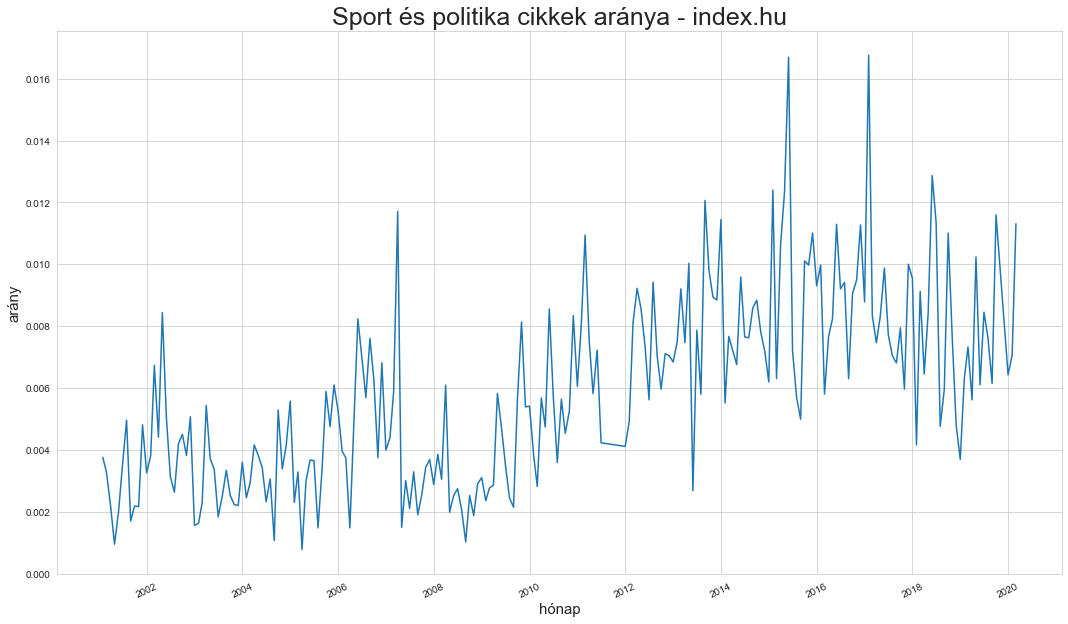

In [200]:
plt.rcParams['figure.figsize'] = [18, 10]
g = sns.lineplot(x="month", y="arany", data=cnt)
g.set_title("Sport és politika cikkek aránya - index.hu", fontsize= 25)
g.set_ylabel('arány')
g.set_xlabel('hónap')
sns.set_style("whitegrid")

plt.rcParams["axes.labelsize"] = 15
plt.xticks(rotation=25);

In [201]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(cnt.index, cnt['arany'])
cnt['trend'] = slope * cnt.index + intercept

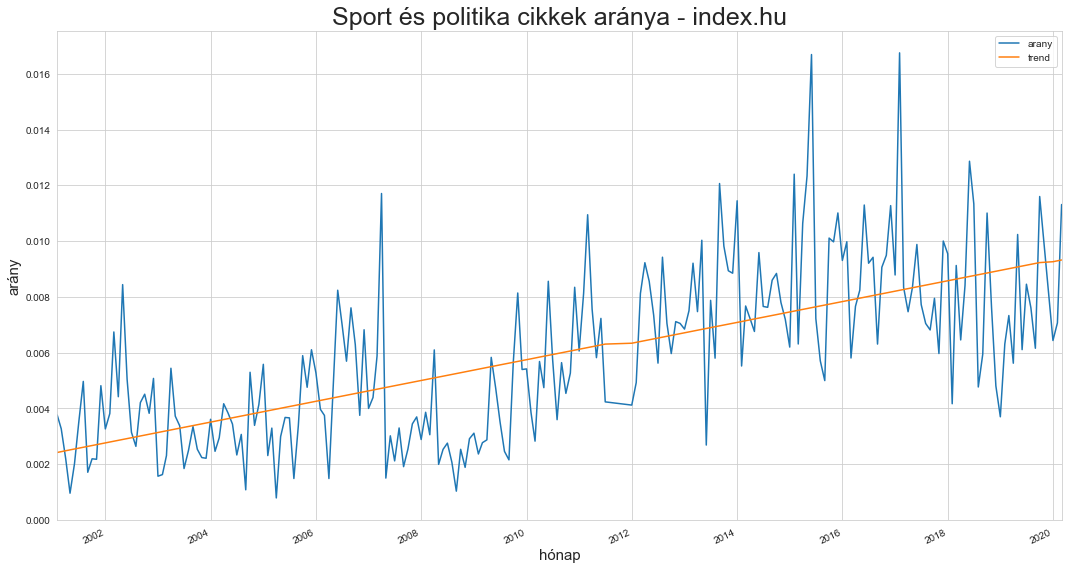

In [202]:
fig = plt.figure(figsize=(18,10))
ax1 = fig.add_subplot(1,1,1)

g1 = cnt.plot(y='arany', x='month',  ax=ax1)
g2 = cnt.plot(y='trend', x='month', ax=ax1)

g1.set_title("Sport és politika cikkek aránya - index.hu", fontsize= 25)
g1.set_ylabel('arány')
g1.set_xlabel('hónap')
sns.set_style("whitegrid")

plt.rcParams["axes.labelsize"] = 15
plt.xticks(rotation=25);

## Polaritás idősor

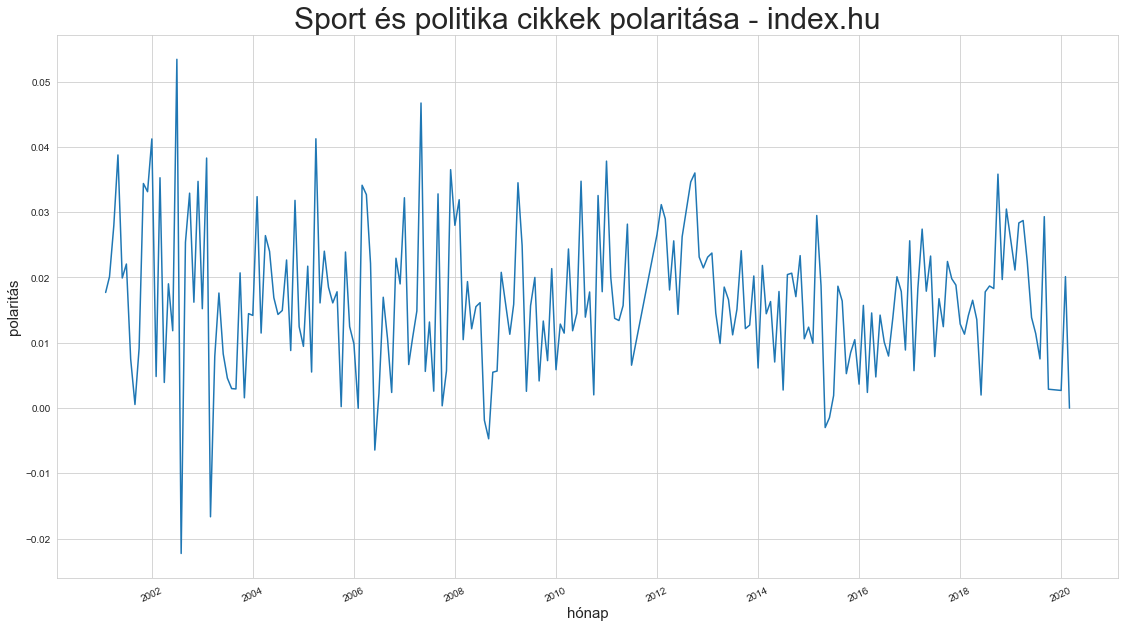

In [203]:
plt.rcParams['figure.figsize'] = [19, 10]


g=sns.lineplot(x="month", y="senti_pol", data=df1, ci=None)

g.set_title("Sport és politika cikkek polaritása - index.hu", fontsize=30)
g.set_ylabel('polaritás')
g.set_xlabel('hónap')
sns.set_style("whitegrid")

plt.rcParams["axes.labelsize"] = 15
plt.xticks(rotation=25);

In [72]:
df1[['cim', 'month', 'senti_pol']]

df1[df1['senti_pol'] == df1['senti_pol'].min()]

df1[(df1['month'] > '2015-01-01') & (df1['month'] < '2015-12-01')].sort_values(by=['month'])



cim  \
"35401"  Az EU is helyet követelne magának a magyar-oro...   
"35485"         Heroikus videóval emlékezik Orbán Putyinra   
"35469"  Gyalázatos manipulációval lett elnök a rezsibi...   
"35452"                       Így dumálta le Putyin Orbánt   
"35432"              Orbán kiengedte Putyint a karanténból   
"35418"       Putyin a budapesti hídfőről üzent a világnak   
"35416"     Putyin látogatásának legjobb videós pillanatai   
"35412"                         Orbán csak kamubejelentett   
"35409"                             Akkor most jön a béke?   
"30259"  Egymilliárd járt a győztes meccsért a katari k...   
"35398"                 Így hálózta be a sportot a Gazprom   
"35379"           Colleen Bell az ukrán ügyvivővel ebédelt   
"35354"              Feneketlen pénznyelő az orosz futball   
"35342"  A Femen debütált Budapesten: meztelen aktivist...   
"35318"          Putyin legyőzhetetlen, bárkit földhöz vág   
"35314"  Arrigo Sacchi: Nem vagyok rasszista, de az ola...   
"35299"        Ha ez igaz, fölöslegesen jön hozzánk Putyin   
"35298"           Szép magyar karrierek szovjet diplomával   
"35297"          A Kreml díszőrsége koszorúz a Fiumei úton   
"35278"  Ismeri azt a viccet, hogy a Jobbik nem igazodi...   
"35274"          Bayer: Amit Orbán csinál, az gyurcsányság   
"35261"  Lehet-e jobban nyalni Putyinnak, mint Bayer Zs...   
"35246"            A hátunk közepére kívánjuk most Putyint   
"35241"              Tudja, mivel töltötte Orbán az estét?   
"35240"                       Hideg széllel várjuk Putyint   
"35239"                 Lezárják a fél várost Putyin miatt   
"35232"                 Leszállt Putyin limuzinja az égből   
"35208"  Orbán elárulja Nagy Imrét, ha kezet fog Putyinnal   
"35495"  Colleen Bellnek személyesen Szijjártó mesélt a...   
"35203"                Elhunyt a 101 éves magyar olimpikon   
"35549"           Kinek nagyobb? Putyinnak vagy Merkelnek?   
"35709"     Volt egyszer egy lengyel, magyar, két jó barát   
"30737"                  Apa, abba kellene hagynod a cigit   
"31340"       Budapest rendezheti a 2017-es cselgáncs-vb-t   
"33456"            Orbán elárulta, miért hívta meg Putyint   
"33787"  Egyesülhet a két legnagyobb tekvondós világsze...   
"33803"          Túlzás, hogy én lennék a század riportere   
"33813"                12 magyar edző a Serie A-ban? Igen!   
"33920"  MOB: Budapest legyen Boston kihívója az olimpi...   
"34191"                    Az MU-veréstől a totális csődig   
"34365"  Politikától mentes legyen az olimpiai pályázat...   
"34558"             A győri akadémiáról erősített a Zsolna   
"34701"    A prágai stadionszörnyet semmi nem pusztítja el   
"34786"                               A vereség íze: a vér   
"34795"  Utána furcsa csend volt: 70 éve ért véget Buda...   
"34969"               Itt lesznek útlezárások Putyin miatt   
"35012"  Puskás után már Bajner nevét is ismeri az egés...   
"35131"               Megszereztük Putyin pesti programját   
"35133"  Ellenforradalmi emlékművet adnak át Putyin ked...   
"35179"   Akár 300 milliárdba is fájhat a paksi titkolózás   
"36890"           Itt vannak Orbán Viktor futballokosságai   
"36837"                Titkok és inkorrektségek az Indexen   
"36236"          Már biztos: télen lesz a 2022-es focivébé   
"36218"  Nem a dobogóért csináljuk, csak szeretjük kíno...   
"36150"  Seszták miniszter lett, a kisvárdai csapat pén...   
"36076"  És akkor Orbán Viktor megértette: Magyarország...   
"36064"   Ömlik a pénz Seszták kisvárosának focicsapatához   
"35972"    Van ország, ahol sokkal szomorúbbak a drukkerek   
"35872"          Gyilkos űrhajóból az űr Volkswagenje lett   
"35617"  Tudja, mennyi pénz jutott TAO-ból a utánpótlás...   
"35180"                     Tószt nélkül inni alkoholizmus   
"61"              Dárdai: Nem kell engem überdimenzionálni   
"37625"               Végre! Két új edzőpályát kap Felcsút   
"40244"              Tarsoly Szijjártó segítségében bízott   
"40224"  Csányi majd lesz

In [174]:
avg = df1[['topic', 'month', 'senti_pol']].groupby(['month', 'topic']).mean().reset_index()

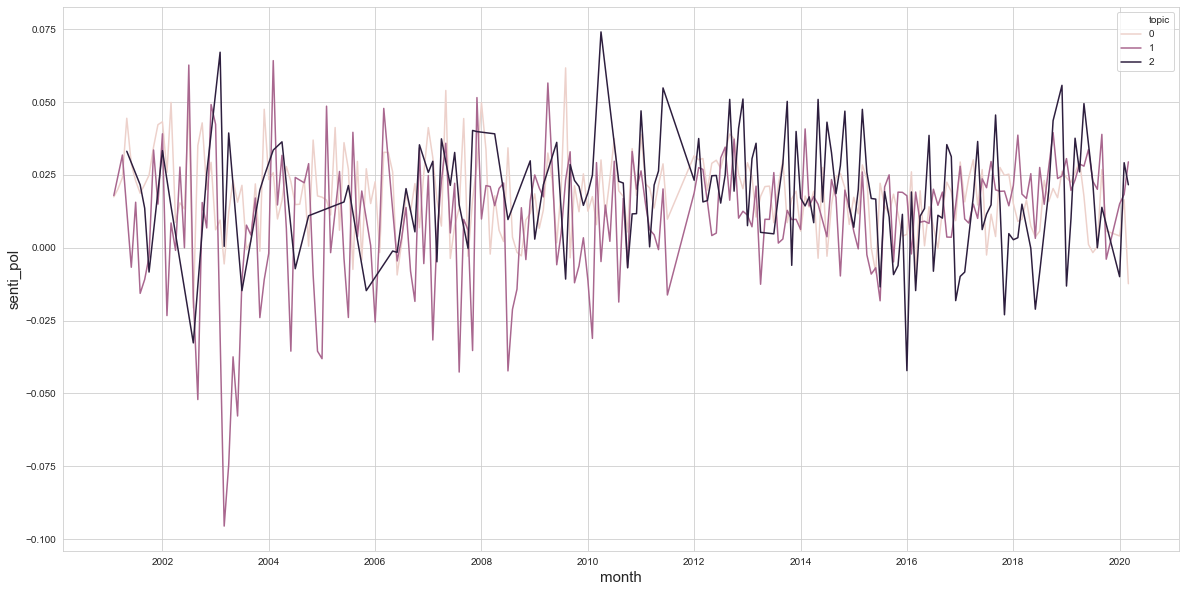

In [176]:
g=sns.lineplot(x="month", y="senti_pol", hue='topic', data=avg, ci=None)


In [204]:
df2 = df1[df1['senti_pol'] != 0]

df2 = df2[df2['cim'] != 'Életfogytiglant kaptak a szerepjátékos gyilkosok']
df2 = df2[df2['cim'] != '200 ezer szexuális áldozat lehet a német sportban']

df2['posneg'] = np.where(df2['senti_pol'] > 0, "pozitív", "negatív")

In [205]:
nemkell = ['200 ezer szexuális áldozat lehet a német sportban',
          'Életfogytiglant kaptak a szerepjátékos gyilkosok',
          'Sztojcskov élő adásban sírt,',
          'A halálos botrány után leállt az olasz foci',
          'Két magyar tűnt el Katowicéban',
          'Tizenötmillió euróba került az olasz stadiono',
          'Tömegverekedés a kínai válogatott angliai meccsén',
          'Kizárhatják a görögöket',
          'Vesztegetési botrány a FIFA kongresszusa előtt',
          'Futás közben sült el a rendőr fegyvere',
          'Pert nyert a FIFA elnöke',
          'Kizárta tagjai közül Azerbajdzsánt a FIFA']

In [206]:
df2 = df2[~df2['cim'].str.contains('|'.join(nemkell))]

In [208]:
len(df2)

3985

In [207]:
df2['senti_abs'] = abs(df2['senti_pol'])

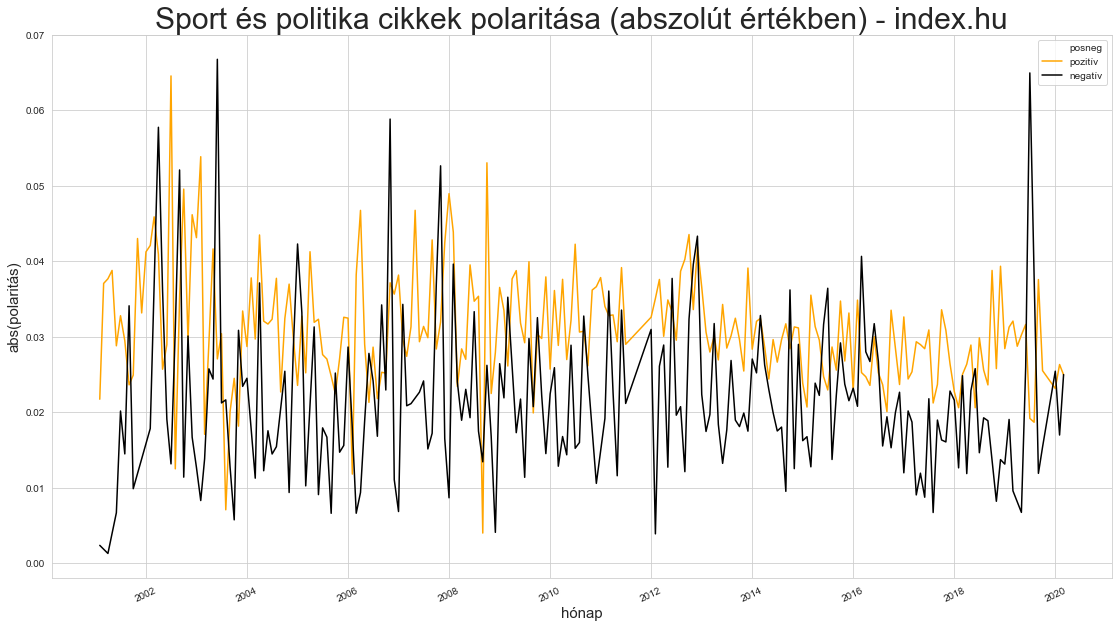

In [98]:
plt.rcParams['figure.figsize'] = [19, 10]

g=sns.lineplot(x="month", y="senti_abs", palette=("orange", "black"), hue='posneg', data=df2, ci=None, )

g.set_title("Sport és politika cikkek polaritása (abszolút értékben) - index.hu", fontsize=30)
g.set_ylabel('abs(polaritás)')
g.set_xlabel('hónap')
sns.set_style("whitegrid")

plt.rcParams["axes.labelsize"] = 15
plt.xticks(rotation=25);

In [100]:
df2[(df2['month'] > '2016-01-01') & (df2['month'] < '2019-12-01') & (df2['posneg'] == 'negatív') ][['cim', 'tag', 'month', 'senti_abs']].sort_values(['month'])

cim  \
"34181"  A tanárok magányos Don Quijotékként küszködnek...   
"34285"  Magáncég kapta a Hosszú-botrányt kirobbantó vi...   
"34924"  Blatter: Olyan nincs, hogy valaki megvegyen eg...   
"35096"  Mindent kipakolt volna a váratlanul meghalt an...   
"35330"          A MOB és a MÚSZ között teljes az összhang   
"35546"            Gulyás rákérdez Kubatovnál a kopaszokra   
"35597"    Megint retteghetnek, hogy rájuk rúgják az ajtót   
"33086"  Afrika Salman Bin Ibrahim al-Kalifa FIFA-elnök...   
"35652"                 Megbuktatnák Kubatovot a szurkolói   
"35745"  Megvan a FIFA új elnöke: a BL-sorsolásokról is...   
"31074"    A FIFPro szerint nem elég jó a FIFA reformterve   
"36158"          Világklasszis etióp futók is doppingoltak   
"36693"  A Német Labdarúgó Szövetség nem tudta bizonyít...   
"36915"                Az atlétikában kitört a hidegháború   
"38081"  Putyin a sportvezetésre veri az orosz doppingb...   
"38246"       A MOB lezártnak tekinti a Török Ferenc-ügyet   
"39627"  A Fradinál engedmény? Léptek a vidéki futballs...   
"20"                      Dolgozz, vagy soha nem mész haza   
"698"    Kirúgják a FIFA-ból a görögöket, ha nem lesz kupa   
"1276"   Még nincs vége a botránylavinának Ez történt a...   
"2007"   Reinhard Grindel lett a Német Labdarúgó Szövet...   
"2050"        Visszavonták a labdarúgó Görög Kupa törlését   
"2436"   Tiltott hormonokkal fogták meg a sprinter kaja...   
"4633"   A magyar fociválogatott legnagyobb bajából kel...   
"7772"   Nem enged a sztrájkolóknak a kormány, folytató...   
"7493"          A foci Orbánja vagy a politika Mourinhója?   
"7371"                         Lángokban áll Franciaország   
"7145"            Az EU megosztására jöhet Lavrov Orbánhoz   
"5396"                        Csak haverkodni akartam vele   
"5664"             130 éve nem változott ekkorát a futball   
"7774"      Drogbanda rabolhatta el a mexikói futballistát   
"5272"   Tegyük fel az internetre a szexuális bűnözők a...   
"5685"                        Olimpia kenyai futók nélkül?   
"8134"   Határozatlan idejű vasutassztrájk kezdődött Fr...   
"8089"   Benzema: Politikai, rasszista nyomásra maradta...   
"9450"   Pedagógustüntetés: a szakadó eső sem riasztott...   
"11315"                        Mit játszik Putyin az Eb-n?   
"10000"  Az orosz huligán nem iszik, hanem verekedni tanul   
"10429"  Megvan, miért balhéztak és verték egymást a ho...   
"10432"   Még focihimnuszukat is tőlünk lopták a izlandiak   
"10636"       Tényleg hazaküldenek minden londoni magyart?   
"10784"                Évszázados válsággal jön az olimpia   
"10885"  Öncélú és hasztalan volt a spanyolok tiki-taká...   
"11387"  Kívülről borzalom, boncolva tanulmány a legros...   
"14090"  Putyin: Felfüggesztik a doppingügyben érintett...   
"14036"  Propagandafilmben mosdatják az orosz doppingol...   
"12564"  Államtitkár ilyen harciasan még nem védte hián...   
"14220"  Az összes orosz sportolót kitilthatják az olim...   
"12066"  Nincs az a botrány, ami után a Fidesz az út sz...   
"14632"           Nem a Fradi siklott ki, hanem a rendszer   
"15557"       Felpörgött a harc a Hármashatár-hegy tetején   
"12481"        Javában zajlik a kiberháború Oroszországgal   
"15391"  Számíthatunk rá, hogy hazudnak az olimpia költ...   
"15818"            Erdogan a futballbíróknak sem kegyelmez   
"16945"   Ha nem úszhat a doppingos, ne ússzon a füves sem   
"16038"                       Ön is gyűlöli a Pokémon Gót?   
"16194"     Jó buli lesz az olimpia, csak kicsit erőszakos   
"16275"    Az olimpián elindulni nem kell félnetek jó lesz   
"16542"               Orbán nem szólna bele az FTC ügyeibe   
"16924"  A sportolónőkben még mindig a férjük és a küls...   
"17794"      Időutazás Riótól Szöulig, oda-vissza többször   
"17858"    Buktunk egy bronzot, de érik az újabb aranyérem   
"17984"            Már a csapból is a munkaerőhiány folyik   
"19635"        Paralimpia: a jegyek 60 százalékát adták el   
"21633"          Senki ne

In [94]:
df2[(df2['posneg'] == 'negatív') & (df2['senti_abs'] > 0.06)][['cim', 'tag', 'month', 'senti_abs']].sort_values(['month'])

cim  \
"20851"   A Kirch csődje ellenére is láthatjuk a foci vb-t   
"5979"                           Nem vetkőzik a válogatott   
"7317"           Kizárta tagjai közül Azerbajdzsánt a FIFA   
"12095"  Jogi szakértő: álszent óvatosság a futballhuli...   
"19620"               Megkéseltek egy görög sportújságírót   
"5515"           Nem lehet 'buzizni' az angol stadionokban   
"28447"  Három embert letartóztattak a lengyel botrány ...   
"45195"                              Hol a helye Dakarnak?   
"33331"            Foci, politika nem számít, csak a balhé   
"34344"           Csavargatta-e a bíró nemi szervét Fitos?   
"12889"   Az újságíró-gyilkosságok megfélemlítik a szakmát   
"43449"           Délebbre hős lenne a szexbotrányos Terry   
"15354"        Teljesen nullák voltunk, ez egy rakás hülye   
"16187"      Ha a politika beleszól, kizárjuk a franciákat   
"28472"            Letöltendő a padtársát agyonverő fiúnak   
"30932"  Négyezren tiltakoztak Berlinben a futballszöve...   
"1276"           Megint balhéztak a szerb futballhuligánok   
"22561"        140 milliárd dollár forog a zugfogadásokban   
"1958"            Megint új időpontja van az öttusa-vb-nek   
"57239"  Az AI a brutális ukrán rendőröktől félti a fut...   
"64073"                  Megpróbálják eltörni egymás lábát   
"87339"     A Jobbikra is visszaüthet Szegedi feljelentése   
"92017"          Blatter kiakadt az agyonvert a partjelzőn   
"6883"                      Egyesével ki fogom nyírni őket   
"28288"                       Egy euróért nem eladó a Pécs   
"42606"                 Román-szerb összeesküvés ellenünk?   
"32159"           Minden sport háború, a düh lendületet ad   
"1642"             Megvan, kiket anyáznak majd a foci-vb-n   
"44348"  Csak a tiltakozót büntették meg a debreceni fl...   
"10707"          Ronaldo: Ez az én hazám, szégyellem magam   
"20270"          Hőbörög? Pogózik? Csak egy ugrás a börtön   
"29170"                 Szerbia: Ez albán terrorakció volt   
"35314"  Arrigo Sacchi: Nem vagyok rasszista, de az ola...   
"8605"                Már a szponzorok is utálják Blattert   
"9045"   FIFA: Oroszország és Katar is elveszítheti a v...   
"10173"           Lemondott a paralimpiai bizottság elnöke   
"12832"  A horvát miniszterelnök menti a válogatottat a...   
"14696"  Az oroszok elmondták, micsoda valójában Sepp B...   
"23733"        Itt a vége: Blattert felfüggesztette a FIFA   
"5521"            Trópusi vírus okoz egyre nagyobb pánikot   
"34924"  Blatter: Olyan nincs, hogy valaki megvegyen eg...   
"20"                      Dolgozz, vagy soha nem mész haza   
"5272"   Tegyük fel az internetre a szexuális bűnözők a...   
"10000"  Az orosz huligán nem iszik, hanem verekedni tanul   
"10429"  Megvan, miért balhéztak és verték egymást a ho...   
"11315"                        Mit játszik Putyin az Eb-n?   
"12066"  Nincs az a botrány, ami után a Fidesz az út sz...   
"46477"  A nyitott mellkassal szállított kislány állapo...   
"1853"             Tetszhalott Donyeck a háború árnyékában   
"30896"  Vádat emeltek a szélsőséges MNA nyolc tagja ellen   
"4292"   Miklós Edit szerint ő a Sí Szövetség elnöke, a...   
"5557"   Szidhatják Leekenst, de az akadémiák és a poli...   
"11489"  Még többet fizethetnek a klubok, ha rasszisták...   

                                                       tag      month  \
"20851"                                      Sport,Futball 2002-04-01   
"5979"                         Sport,Sporthírek,Labdarúgás 2002-08-01   
"7317"                                 Sport,Futball,hírek 2003-04-01   
"12095"                                      Sport,Futball 2003-06-01   
"19620"                                   Sport,Sporthírek 2004-10-01   
"5515"                                       Sport,Futball 2005-01-01   
"28447"       Sport,Sporthírek,futball,lengyelország,bunda 2008-10-01   
"45195"                        Sport,dakar,rali,futball-vb 2009-01-01   
"33331"           Sport,Futball,pmfc,matyi,dezső,

In [209]:
df2["darab"]=1
ct2=df2[["month","darab","posneg"]]

In [210]:
ct2 = ct2.reset_index().groupby(['month','posneg'], as_index=False).sum()

In [211]:
ct2

month   posneg  darab
0   2001-02-01  negatív      1
1   2001-02-01  pozitív      5
2   2001-03-01  pozitív      5
3   2001-04-01  negatív      1
4   2001-04-01  pozitív      3
5   2001-05-01  pozitív      2
6   2001-06-01  negatív      1
7   2001-06-01  pozitív      3
8   2001-07-01  negatív      1
9   2001-07-01  pozitív      6
10  2001-08-01  negatív      6
11  2001-08-01  pozitív      6
12  2001-09-01  negatív      2
13  2001-09-01  pozitív      3
14  2001-10-01  negatív      2
15  2001-10-01  pozitív      3
16  2001-11-01  pozitív      4
17  2001-12-01  pozitív      9
18  2002-01-01  pozitív      7
19  2002-02-01  negatív      2
20  2002-02-01  pozitív      4
21  2002-03-01  pozitív     10
22  2002-04-01  negatív      3
23  2002-04-01  pozitív      5
24  2002-05-01  negatív      1
25  2002-05-01  pozitív     14
26  2002-06-01  negatív      2
27  2002-06-01  pozitív      5
28  2002-07-01  negatív      1
29  2002-07-01  pozitív      6
30  2002-08-01  negatív      4
31  2002-08-01  pozitív      1
32  2002-09-01  negatív      1
33  2002-09-01  pozitív      8
34  2002-10-01  negatív      3
35  2002-10-01  pozitív      8
36  2002-11-01  negatív      2
37  2002-11-01  pozitív      7
38  2002-12-01  negatív      2
39  2002-12-01  pozitív      9
40  2003-01-01  negatív      2
41  2003-01-01  pozitív      2
42  2003-02-01  negatív      1
43  2003-02-01  pozitív      3
44  2003-03-01  negatív      4
45  2003-03-01  pozitív      2
46  2003-04-01  negatív      3
47  2003-04-01  pozitív      9
48  2003-05-01  negatív      4
49  2003-05-01  pozitív      7
50  2003-06-01  negatív      2
51  2003-06-01  pozitív      8
52  2003-07-01  negatív      3
53  2003-07-01  pozitív      3
54  2003-08-01  negatív      1
55  2003-08-01  pozitív      6
56  2003-09-01  negatív      4
57  2003-09-01  pozitív      4
58  2003-10-01  negatív      1
59  2003-10-01  pozitív      7
60  2003-11-01  negatív      2
61  2003-11-01  pozitív      4
62  2003-12-01  negatív      2
63  2003-12-01  pozitív      4
64  2004-01-01  negatív      3
65  2004-01-01  pozitív      8
66  2004-02-01  pozitív      6
67  2004-03-01  negatív      4
68  2004-03-01  pozitív      5
69  2004-04-01  negatív      2
70  2004-04-01  pozitív      9
71  2004-05-01  negatív      2
72  2004-05-01  pozitív      9
73  2004-06-01  negatív      3
74  2004-06-01  pozitív      7
75  2004-07-01  negatív      2
76  2004-07-01  pozitív      4
77  2004-08-01  negatív      3
78  2004-08-01  pozitív      4
79  2004-09-01  pozitív      3
80  2004-10-01  negatív      5
81  2004-10-01  pozitív      8
82  2004-11-01  negatív      1
83  2004-11-01  pozitív      8
84  2004-12-01  negatív      3
85  2004-12-01  pozitív      7
86  2005-01-01  negatív      3
87  2005-01-01  pozitív     11
88  2005-02-01  negatív      1
89  2005-02-01  pozitív      5
90  2005-03-01  negatív      5
91  2005-03-01  pozitív      4
92  2005-04-01  pozitív      2
93  2005-05-01  negatív      2
94  2005-05-01  pozitív      6
95  2005-06-01  negatív      2
96  2005-06-01  pozitív      8
97  2005-07-01  negatív      2
98  2005-07-01  pozitív      8
99  2005-08-01  negatív      1
100 2005-08-01  pozitív      3
101 2005-09-01  negatív      2
102 2005-09-01  pozitív      7
103 2005-10-01  negatív      7
104 2005-10-01  pozitív      8
105 2005-11-01  negatív      1
106 2005-11-01  pozitív     12
107 2005-12-01  negatív      6
108 2005-12-01  pozitív      9
109 2006-01-01  negatív      4
110 2006-01-01  pozitív     10
111 2006-02-01  negatív      4
112 2006-02-01  pozitív      6
113 2006-03-01  negatív      1
114 2006-03-01  pozitív     10
115 2006-04-01  negatív      1
116 2006-04-01  pozitív      3
117 2006-05-01  negatív      2
118 2006-05-01  pozitív     12
119 2006-06-01  negatív     12
120 2006-06-01  pozitív      9
121 2006-07-01  negatív     10
122 2006-07-01  pozitív     10
123 2006-08-01  negatív      2
124 2006-08-01  pozitív     14
125 2006-09-01  negatív      5
126 2006-09-01  pozitív     16
127 2006-10-01  negatív      9
128 2006-1

In [215]:
ct2 = pd.merge(ct2, mcount[['month', 'num_per_ho']], on='month', how="left")

In [216]:
ct2["arany2"] = ct2["darab"]/ct2["num_per_ho"]

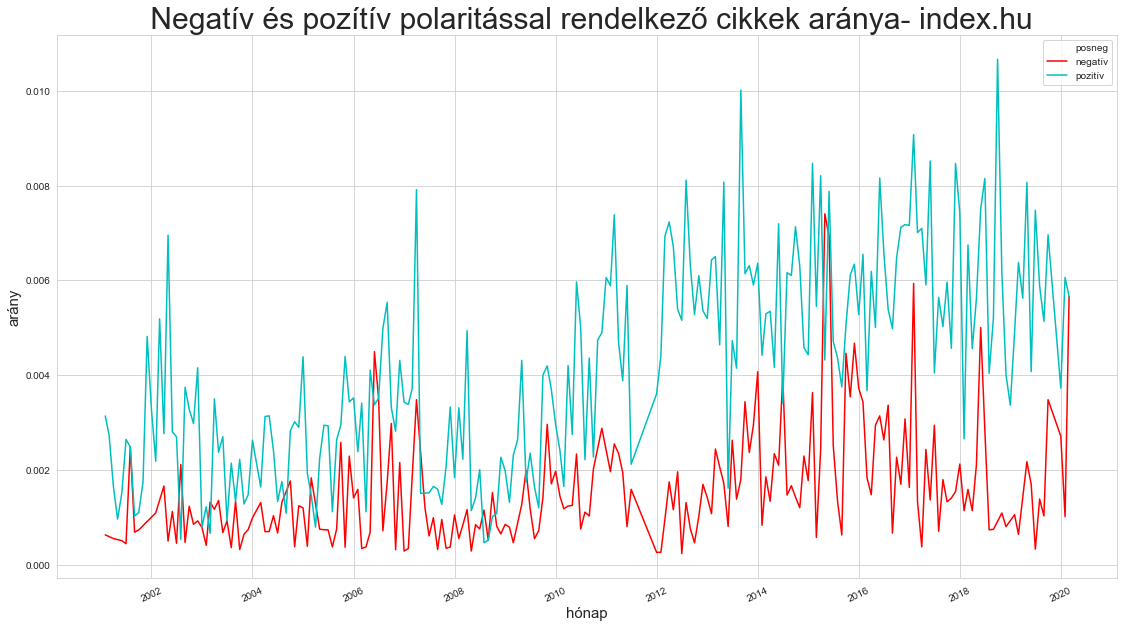

In [217]:
g=sns.lineplot(x="month", y="arany2", palette=('red', 'c'), hue='posneg', data=ct2, ci=None, )

g.set_title(" Negatív és pozítív polaritással rendelkező cikkek aránya- index.hu", fontsize=30)
g.set_ylabel('arány')
g.set_xlabel('hónap')
sns.set_style("whitegrid")

plt.rcParams["axes.labelsize"] = 15
plt.xticks(rotation=25);

In [247]:
ct2[(ct2['arany2'] > 0.008) & (ct2['posneg'] == 'pozitív')]

month   posneg  darab  num_per_ho_x  num_per_ho_y  num_per_ho  \
254 2012-08-01  pozitív     31          3820          3820        3820   
272 2013-05-01  pozitív     33          4087          4087        4087   
280 2013-09-01  pozitív     39          3895          3895        3895   
314 2015-02-01  pozitív     28          3306          3306        3306   
318 2015-04-01  pozitív     27          3290          3290        3290   
346 2016-06-01  pozitív     26          3187          3187        3187   
362 2017-02-01  pozitív     26          2865          2865        2865   
370 2017-06-01  pozitív     25          2935          2935        2935   
382 2017-12-01  pozitív     22          2599          2599        2599   
396 2018-07-01  pozitív     23          2823          2823        2823   
401 2018-10-01  pozitív     31          2907          2907        2907   
413 2019-05-01  pozitív     26          3223          3223        3223   

       arany2  
254  0.008115  
272  0.008074  
280  0.010013  
314  0.008469  
318  0.008207  
346  0.008158  
362  0.009075  
370  0.008518  
382  0.008465  
396  0.008147  
401  0.010664  
413  0.008067

In [248]:
df2[(df2['month'] == '2017-02-01') & (df2['posneg'] == 'pozitív')]

cim  \
"60701"                   Olimpia? Még vitázni sincs miről   
"61823"  A kormány szerint ezért jár 3 milliárd magyar ...   
"61957"                    Kell nekünk egyáltalán olimpia?   
"62604"                Katinka nem egy különálló univerzum   
"62627"             Egyetlen gól hiányzott az A csoporthoz   
"62852"  Orbán: Legnagyobb erény, ha az ember tudja, ho...   
"65564"  Orbán focicsapatának ki kell adnia, mire költö...   
"65662"  Lőni, vívni, terepet járni tanít a Honvédelmi ...   
"65664"        Miért nem kellett a kajak-kenu a Fidesznek?   
"65954"  Magyar pénzből a horvát focit fejlesztené Mész...   
"66052"     Nem erre készültünk, a PSG mindenben jobb volt   
"66198"  Szavazzon: olimpia helyett vegyünk tengert, he...   
"66242"       Nemzeti futballkonzultációt indított az MLSZ   
"66401"  Nagy állami támogatással épül a nemzeti kosára...   
"66405"  A Fidesz Tarlósra tolja a felelősséget, lefújj...   
"66417"  A Fidesz nem vállalhat be egy sikertelen népsz...   
"66493"          Befagyasztják Budapest olimpiai költéseit   
"66719"      A MOB továbbra is a budapesti olimpia mellett   
"66728"                           2021-ig nem fogunk fázni   
"66811"           Hahó, olimpiai bizottság, itt a valóság!   
"66826"  Kiderült, miért Orbán focicsapata kapta a legt...   
"66999"                    Magolni jól tud a magyar gyerek   
"67009"          Gémesi György pártalapításon töri a fejét   
"67099"    Olimpia nélkül lőttek a magyar szlalomkajaknak?   
"67173"         Brutális erőfölényben Orbán Viktor csapata   
"67362"           Mintha a jégtánc kerékpárra került volna   

                      datum         szerzo  \
"60701"  2017.02.01. 09:53              NA   
"61823"   2017.02.02. 06:46             NA   
"61957"   2017.02.02. 07:39  Stubnya Bence   
"62604"   2017.02.02. 14:33             NA   
"62627"   2017.02.02. 14:41          Index   
"62852"   2017.02.02. 17:24             NA   
"65564"   2017.02.10. 14:08             NA   
"65662"   2017.02.11. 10:50            DSz   
"65664"   2017.02.11. 10:50             NA   
"65954"   2017.02.14. 12:17             NA   
"66052"   2017.02.15. 08:12          lovas   
"66198"   2017.02.16. 07:05             NA   
"66242"   2017.02.16. 11:32             NA   
"66401"   2017.02.17. 14:27             NA   
"66405"   2017.02.17. 14:57             NA   
"66417"   2017.02.17. 16:14             NA   
"66493"   2017.02.18. 14:47             NA   
"66719"   2017.02.20. 18:18             NA   
"66728"   2017.02.20. 19:18             bp   
"66811"   2017.02.21. 14:42             NA   
"66826"  2017.02.21. 16:30              NA   
"66999"   2017.02.23. 07:23             NA   
"67009"  2017.02.23. 07:54           joobs   
"67099"   2017.02.23. 18:36             NA   
"67173"   2017.02.24. 11:16             NA   
"67362"   2017.02.26. 11:30             NA   

                                                       tag  \
"60701"  Sport,2024,Budapest,Kedvenc,budapest,2024,buda...   
"61823"  Sport,topolya,seszták,miklós,délvidéki,futball...   
"61957"  Gazdaság,olimpia,2024,budapesti,olimpia,dénes,...   
"62604"  Sport,Úszás,hosszú,katinka,bienerth,gusztáv,ma...   
"62627"  Sport,Téli,sport,bandy,világbajnokság,magyar,v...   
"62852"  Belföld,vlagyimir,putyin,putyin,budapesten,orb...   
"65564"  Sport,Futball,funa,felcsút,orbán,viktor,mészár...   
"65662"  Belföld,honvédelmi,sportszövetség,honvédelem,l...   
"65664"  Sport,Kajak-kenu,schmidt,gábor,mkksz,baráth,etele   
"65954"  Sport,Futball,felcsút,funa,mészáros,lőrinc,pus...   
"66052"  Sport,Bajnokok,ligája,barcelona,psg,futball,ba...   
"66198"  Gazdaság,budapesti,olimpia,olimpia,2024,erdély...   
"66242"             Sport,Futball,mlsz,futball,konzultáció   
"66401"   Sport,Kosárlabda,kosárlabda,pvsk,rátgéber,lászló   
"66405"  Belföld,nolimpia,fidesz,népszavazás,tarlós,istván   
"66417"  Belföld,nolimpia,momentum,mozgalom,népszavazás...   
"66493"  Sport,2024,Budapest,budapesti,olimpia,momentum...   
"66719"  Sport,2024,B

In [243]:
df2[(df2['month'] > '2011-01-01') & (df2['month'] > '2011-06-01') & (df2['posneg'] == 'pozitív')].sort_values(by=['month'])

cim  \
"14771"   A riói olimpián lesznek érezhetőek az új sport...   
"15140"           Hogyan válunk régiós gazdasági központtá?   
"15176"        Rendezte tartozásait a Magyar Úszó Szövetség   
"15654"   Az Atlantis kabinjában: Aki ötször sétált az ű...   
"57030"   Egymillió forint Kis Gergőnek, Pásztor Bencéne...   
"62185"                              Esik a hó, fingik a ló   
"62397"   Spanyolországban tesztelik a Maruzsi-féle gólb...   
"62834"             Schmitt visszautasította a plágiumvádat   
"64315"       Gondolatokban is megelőzte Schmittet a bolgár   
"65404"           A bolgár után német szál a Schmitt-ügyben   
"66857"           Nem az IMF dönt, hogy lesz-e új FTC-pálya   
"75410"   Az európai szövetség elnöke támogatja a magyar...   
"77646"                    A Csepel szívesen látná a Fradit   
"77873"   Héraklész Gála: Gyurta Dániel és Kovács Sarolt...   
"81454"             Ha bármelyikük megsérül, oda az olimpia   
"54191"             Négy vb-futam lesz idén a Hungaroringen   
"55549"   A gazdasági helyzet miatt bukta Budapest a vil...   
"98099"             Volt segédmunkás, pincér most sztáredző   
"86226"                     Új tulajdonosi kör Nyíregyházán   
"95312"   Szabó Bence: A pekingi eredményt túl kell szár...   
"95384"   Debrecen regionális futball utánpótlásképző kö...   
"95673"              Nem kell kutyát enni az edzői posztért   
"96630"      Elfogadták a MOB új alapszabályának tervezetét   
"96667"   Berki és Dancsó az év sportolói a sportszövets...   
"96701"             Del Bosque-nak tetszik a magyar gólbíró   
"97446"   Saját nevére keresztelte futballcsapatát a mil...   
"95343"   Vívást népszerűsítő bemutatók a női párbajtőr ...   
"97857"       Borkai: A MOB a magyar sport parlamentje lesz   
"98094"                     Megmondtam, két aranyért megyek   
"91013"                        Arab befektetők a Palermónál   
"85548"             Schmitt újrahasznosítgatta a doktoriját   
"85844"     Negyven magyar paralimpikon lehet ott Londonban   
"90890"   Blatter hiszi, hogy Brazília jó vb-t fog rendezni   
"89330"                              Szepesi György 90 éves   
"95367"              Minden stadion mellé még egy stadiont!   
"52628"   Schmitt: Mondhatták volna, hogy többet tegyek ...   
"52434"                           Módosítják a TAO-törvényt   
"50665"   Letették a Debreceni Labdarúgó Akadémia alapkövét   
"50782"         Négy évig várt a védésre Schmitt doktorija?   
"50829"                   Az 570 milliárdos miniszter napja   
"50874"            Megint jön a Real a Puskás Suzuki Kupára   
"51117"                    NOB-oklevél Regőczy Krisztinának   
"51218"              Kitolhatják a TAO-igénylés határidejét   
"51318"            Imi bácsi, Európa edzőjévé akarjuk tenni   
"51678"                        MSZSZ: összefogás a sportért   
"51690"   A úszók is társaságiadó-kedvezményt akarnak tá...   
"51743"                     Megnyirbálják Handó hatásköreit   
"98499"                    Itt mindenkinek kék-sárga a vére   
"99164"         A nosztalgikus szocializmus újra a sportban   
"99459"           16 milliárdot már kapott a magyar futball   
"98562"            A Főgáz 150 millióval támogatja az FTC-t   
"99720"      MLSZ: novemberre biztonságos stadionok lesznek   
"52357"                         2014-re kész a Tüskecsarnok   
"52317"              Stadionépítés indul tavasszal Szegeden   
"52150"      Derítsük ki együtt, honnan másolt még Schmitt!   
"99578"        Grúzia és Azerbajdzsán futball Eb-t rendezne   
"51996"                 Karateünnep knock-down bajnoksággal   
"51819"          Gyulay lecsap az illegális autóversenyekre   
"52065"    Ajánt doppingeredmények manipulálásával vádolják   
"100867"          Kemény: Jobb híján paprika kell a fenékbe   
"100404"       Futballal az SOS Gyermekfalvak alapítványért   
"100234"       A felcsúti futballakadémia kapja a legtöbbet   
"99776"                 Mit akar Maruzsi a 120 milliójával?   
"51800"             Ne b

In [107]:
pos = df2[df2['posneg'] == 'pozitív']
neg = df2[df2['posneg'] == 'negatív']

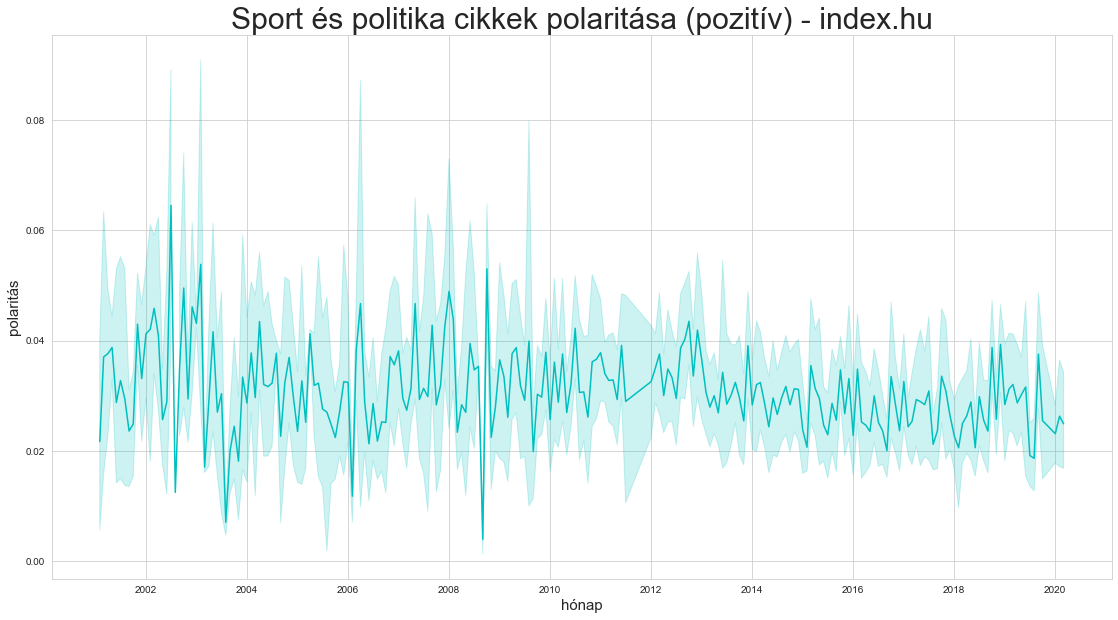

In [111]:

g=sns.lineplot(x="month", y="senti_pol", color='c', data=pos)
g.set_title("Sport és politika cikkek polaritása (pozitív) - index.hu", fontsize=30)
g.set_ylabel('polaritás')
g.set_xlabel('hónap')
sns.set_style("whitegrid")

In [239]:
pos[pos['senti_pol']

cim              datum  \
"3342"  Megnéztük Mészáros Lőrinc horvát focicsapatát  2016.04.26. 08:36   

           szerzo                                        tag  \
"3342"  Dobó Géza  Belföld,mészáros,lőrinc,futball,nk,osijek   

                                                     head  \
"3342"  Januárban jelentették be, hogy Mészáros Lőrinc...   

                                                   szoveg  \
"3342"   Nagy tévedésben van, aki azt hiszi, hogy a vi...   

                                                   merged nyelv  nap  \
"3342"  Januárban jelentették be, hogy Mészáros Lőrinc...    hu  NaN   

                                          cim_cleaned  ... sport merged_ners  \
"3342"  megnéztük mészáros lőrinc horvát focicsapatát  ...     1         NaN   

       politika    id                                              senti  \
"3342"        1  3094  [0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, -1, 0, 0...   

        senti_pol      month topic   posneg senti_abs  
"3342"   0.000624 2016-04-01     1  pozitív  0.000624  

[1 rows x 23 columns]

In [242]:
pos[(pos['month'] > '2008-02-01') & (pos['month'] < '2008-12-01')].sort_values(by=['senti_pol', 'month'])

cim  \
"24116"         1985: aláírják a magyar Forma–1-szerződést   
"24728"         Majd minden miniszter szívni fogja a fogát   
"4737"                         Egy ember egymilliárd ellen   
"14977"     Tényleg elvehetik a futball-vb-t Dél-Afrikától   
"1601"        Szegedi stadionpóker milliárdos ingatlanokon   
"3612"                Görögtüzek égtek Szeged belvárosában   
"34749"  Nemzeti stadion lesz, nem tudni, mikor, miből ...   
"6797"      Nem tesz csodát a svájci gazdasággal a foci-Eb   
"17407"           Irak négy sportolót indíthat az olimpián   
"45361"                   Húsvét után bajnok lehet a Porto   
"5467"         Nyolc aranyat várnak a magyarok az olimpián   
"2170"               Mi veszélyezteti a fogyatékossportot?   
"1179"            Zsebferenc visszavág, Ferenc sajnálatára   
"4518"       A szurkolók úgyis csak a hibáinkra emlékeznek   
"2333"         Holland szövetségi kapitányt akar Kisteleki   
"45253"              Itt van az aranyérmem, eladom, vigyék   
"1734"   Bántja a kormány a paralimpikonokat, vagy nem ...   
"2609"                 Szegény Getafe, fantasztikus Bayern   
"32045"     Egyetlen pályázó a súlyemelő elnöki tisztségre   
"16555"                   Irak nem vehet részt az olimpián   
"9682"       Spanyolország Királyiak kontra köztársaságiak   
"5304"               Varga Miklós, a hajdúsámsoni kamikáze   
"43727"                  Nekem a futball hóbort, nem üzlet   
"32663"                 Giggs lenyomta Raúlt és Sevcsenkót   
"3114"           Már utalják az olimpiai állami támogatást   
"3411"   A MOB és az E.ON keresi a megoldást a fűzfői u...   
"29"     Futballakadémisták veszik be a vidéki kastélyokat   
"12478"          A nok is rengeteget költöttek az Eb alatt   
"1041"               Ennyi döntőt Puhl Sándor sem vezetett   
"4517"                    Felesküdtek a magyar olimpikonok   
"44048"          100 éves az Inter, eufóriában Milánó fele   
"16779"        Tiltakozik az iraki kormány a kizárás ellen   
"17011"          Az oroszok 35-40 aranyat várnak Pekingben   
"19247"                        Egy doppingos hír margójára   
"12502"         Az orosz futball Európa tetejére igyekszik   
"20554"  Schmitt Pál: A pénztelenség térdre kényszeríte...   
"10223"             Gera Zoltán tényleg a Fulhamhez igazol   
"27479"                   Mekkora hülyeség kidobni a pénzt   
"16374"                    Defibrillátor nincs, de van 220   
"32967"             Új elnöke van a súlyemelő szövetségnek   
"2148"          Lesz magyar paralimpiai csapat az olimpián   
"3249"             ÖTM: 695 millió forintra lehet pályázni   
"270"       Mennyi pénzből lesz jó egy magyar futballista?   
"2375"   Nemzeti Sportstratégia: 1,6 milliárd a cselekv...   
"30033"             A magyar sport 8%-ot bukott a válságon   
"2558"              Az MLSZ 800 000 dollárt kap a FIFÁ-tól   
"2989"             Nem mehet az olimpiára az év sportolója   
"31267"           A sport 1,4 milliárdot bukott a válságon   
"15831"        50 defibrillátort kapnak a sportszövetségek   
"6851"              A politikusok körberajongják a Zenitet   
"30981"    Döntetlen az első palesztinai futballmérkőzésen   
"1556"                         Elnöki köszönet Maradonának   
"13217"   A Mercedes nagyon izgatja a magyarok fantáziáját   
"11872"  A németek már az Eb-győzelem megünneplésére ké...   

                                                  datum              szerzo  \
"24116"                               2008.09.10. 11:29              haaszj   
"24728"                               2008.09.15. 11:16        Baksa Roland   
"4737"                                2008.04.28. 18:49               Index   
"14977"  2008.07.14. 10:35 Módosítva: 2008.07.14. 10:36        Mártha Bence   
"1601"                                2008.04.03. 15:02  Csepregi J. Botond   
"3612"                                2008.04.19. 09:16  Csepregi J. Botond   
"34749"                               2008.11.20. 14:36  Csepregi J. Botond   
"6797"      

In [258]:
neg['abs'] = abs(neg['senti_pol'])

neg = neg[neg['cim'] != 'A belgák hova álljanak?']

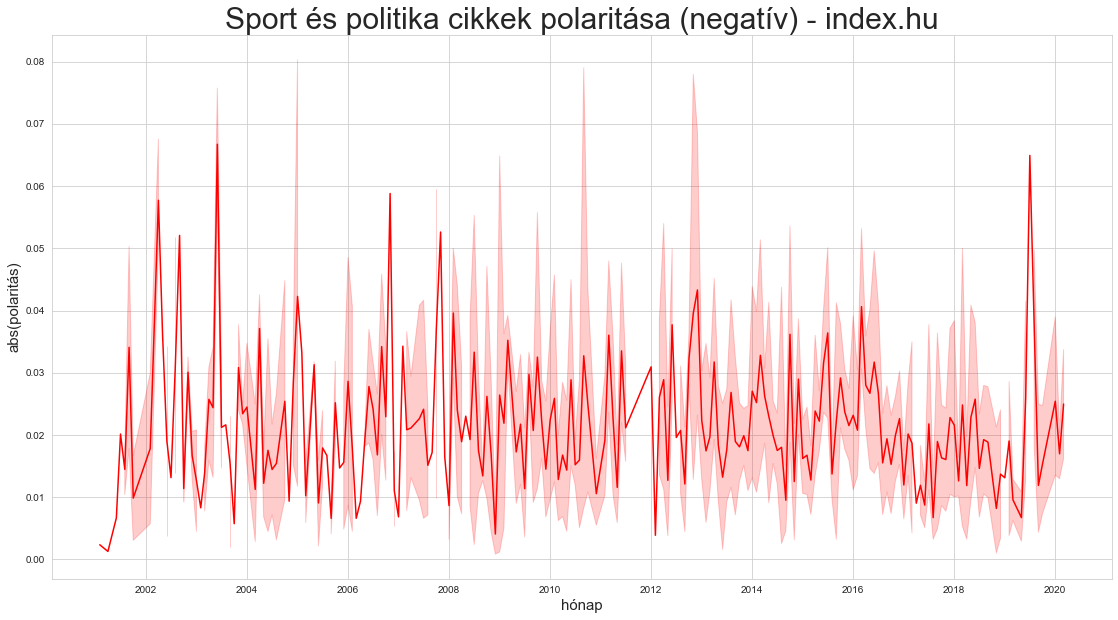

In [259]:
g=sns.lineplot(x="month", y="abs", color='red', data=neg)
g.set_title("Sport és politika cikkek polaritása (negatív) - index.hu", fontsize=30)
g.set_ylabel('abs(polaritás)')
g.set_xlabel('hónap')
sns.set_style("whitegrid")

In [257]:
neg[(neg['month'] > '2003-02-02') & (neg['month'] < '2003-10-01')].sort_values(by=['month','abs'])

cim              datum  \
"2410"   Magyarország 25 ezer dollárral támogatja a dop...  2003.03.02. 14:27   
"2798"     Jánosi: rendkívül kockázatos az olimpiarendezés  2003.03.05. 17:56   
"4085"   Markovits: a Fáy utcát csak a testemen kereszt...  2003.03.18. 19:22   
"5726"                  Tízmillió jár az olimpiai aranyért  2003.03.31. 18:32   
"6953"   Fegyelmi vizsgálat a Spanyol Labdarúgó Szövets...  2003.04.11. 14:31   
"8322"                                 Schmitt nem mond le  2003.04.28. 08:43   
"6465"            Blatter 2006 után is lenne a FIFA elnöke  2003.04.07. 12:33   
"11595"             Árválkodó miniszterelnöki számítógépek  2003.05.29. 10:38   
"11451"                                      Nem ér a neve  2003.05.28. 10:59   
"11816"             Gyurcsány a sporttörvény módosításáról  2003.05.30. 14:52   
"11904"                                  Az FTC közleménye  2003.05.31. 20:21   
"11979"                 Üllői út: botrány és bocsánatkérés  2003.06.02. 09:45   
"12095"  Jogi szakértő: álszent óvatosság a futballhuli...  2003.06.02. 17:49   
"18222"              Mérges kígyók és egyéb drukkerállatok  2003.07.25. 15:25   
"17701"                Mégis keményen megbűntetik a Fradit  2003.07.21. 23:11   
"16090"                 Bundát gyanítanak Lengyelországban  2003.07.08. 10:49   
"21061"           Nemzetközi körözés Klivinyi Zoltán ellen  2003.08.22. 10:50   
"24758"                              'Kellett ez a hét év'  2003.09.25. 21:46   
"21970"                            A belgák hova álljanak?  2003.09.01. 00:12   
"22669"          Juhász: Velünk akarják elvitetni a balhét  2003.09.07. 18:18   
"22912"                                   Ahogy megígértük  2003.09.09. 17:30   

                 szerzo                                 tag  \
"2410"              MTI                               Sport   
"2798"               NA              Sport,Sporthírek,Egyéb   
"4085"            Index                       Sport,Futball   
"5726"               NA                               Sport   
"6953"              MTI                       Sport,Futball   
"8322"            Index                             Belföld   
"6465"               NA  Sport,Futball,hírek,Percről,percre   
"11595"    Spirk József                             Belföld   
"11451"     Napi Online                       Sport,Futball   
"11816"              NA              Sport,Sporthírek,Egyéb   
"11904"           Index                       Sport,Futball   
"11979"       Index/MTI                       Sport,Futball   
"12095"             MTI                       Sport,Futball   
"18222"     Szegő Péter                       Sport,Futball   
"17701"             MTI                       Sport,Futball   
"16090"           Index                       Sport,Futball   
"21061"  Magyar Narancs                     Gazdaság,Magyar   
"24758"  Magyar Narancs                               Sport   
"21970"    Bodoky Tamás                Vélemény,Eheti,Eheti   
"22669"           Index                     Belföld,Belföld   
"22912"   Tóta W. Árpád                    Vélemény,Jegyzet   

                                                      head  \
"2410"   Hétfőn kezdődik Koppenhágában a sportvilág dop...   
"2798"                                                  NA   
"4085"   Katasztrofális helyzetbe került az egyik legné...   
"5726"   Ötszáz nappal az athéni olimpia megnyitója elő...   
"6953"   Pénzügyi szabálytalanságok miatt a legfőbb spa...   
"8322"   Amennyiben a Fidesz május 17-i kongresszusán a...   
"6465"                                                  NA   
"11595"  Az nem meglepő, hogy programozólelkületű minis...   
"11451"  Új névadó szponzori szerződést köt előreláthat...   
"11816"                                                 NA   
"11904"  \Akik csoportosan védtelen sportemberekre táma...   
"11979"  Gyorsított eljárással már hétfő reggel megkezd...   
"12095"  Nincs jogalkotási hiányosság, ugyanakkor indok...   
"18222"  Az FTC s

## Subjectivity analysis

In [ ]:
def subjectivity(df):
    sent = []
    for i in range(0, len(df)):
        if str(df[i]) in pos: 
            sent.append(1)
        elif str(df[i]) in neg: 
            sent.append(1)
        else:
            sent.append(0)
    return sent

In [ ]:
df1['subj'] = df1['tokens'].apply(lambda x: subjectivity(x))

In [ ]:
df1['subj_mean'] = df1['subj'].apply(lambda x: np.mean(x))

### Subjectivity visualizations

In [ ]:
px.histogram(df1, x='subj_mean', title='Subjectivity of Coronavirus articles')

In [ ]:
subjectivitas = df1.groupby(['nap'], as_index=False)['subj_mean'].mean()

px.line(subjectivitas, x='nap', y='subj_mean', 
           title='Articles mean subjectivity per Day')